In [1]:
import sys 
sys.path.append('../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd, QuantumState 

In [2]:
def callback( params, results, prob_error, prob_inc, prob):
    datos.append(prob_error) 

(array([ 2.2994156 , -0.33296988,  1.32385663, -0.05175679, -0.21187853,
        3.14284486,  0.02111804, -2.290041  ,  0.46432014, -0.74477228,
        0.90716426, -0.24557663,  0.77780879, -1.45142752, -1.06933033,
        1.36499137, -0.65842473, -2.48176497, -1.99547144]), 0.06494140625, 200)


Text(0, 0.5, '$\\alpha_{err} p_{err} + \\alpha_{inc} p_{inc}$')

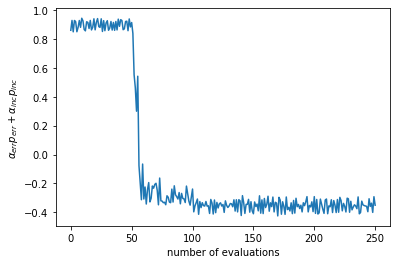

In [3]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = 2*[0], 2*[pi]
th_v1, th_v2 = 2*[0], 2*[0]
fi_v1, fi_v2 = 2*[0], 2*[0]
lam_v1, lam_v2 = 2*[0],  2*[0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.5
α_inc = 0.5
discriminator = nnd( [ ψ, ϕ ], α_err, α_inc  )

datos = [ ]
results = discriminator.discriminate( SPSA(100), params, callback=callback )

print( results )

plt.plot( datos , '-')
plt.xlabel('number of evaluations')
plt.ylabel(r'$\alpha_{err} p_{err} + \alpha_{inc} p_{inc}$')

(array([-1.12347278e-01,  3.39409956e-01, -6.81491569e-02, -2.84050439e+00,
       -2.04270265e-01,  2.85060663e-04,  5.45819356e+00, -1.90070350e-01,
       -6.79585179e-01,  1.48344587e-01, -9.17788785e-01,  2.50660364e-01,
        1.40918930e+00, -1.19592490e+00,  1.82230502e-01, -3.48670577e-01,
        1.75922323e+00, -1.13034380e+00, -1.31581198e+00]), 0.24951171875, 200)


Text(0, 0.5, '$\\alpha_{err} p_{err} + \\alpha_{inc} p_{inc}$')

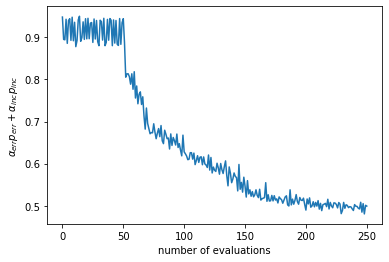

In [4]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = 2*[0], 2*[pi]
th_v1, th_v2 = 2*[0], 2*[0]
fi_v1, fi_v2 = 2*[0], 2*[0]
lam_v1, lam_v2 = 2*[0],  2*[0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.5
α_inc = 0.5
discriminator = nnd( [ ψ, ϕ, χ ], α_err, α_inc  )

datos = [ ]
results = discriminator.discriminate( SPSA(100), params, callback=callback )

print( results )

plt.plot( datos , '-')
plt.xlabel('number of evaluations')
plt.ylabel(r'$\alpha_{err} p_{err} + \alpha_{inc} p_{inc}$')

(array([-0.12068147,  1.64998283,  1.20517835,  0.15712934,  8.16038387,
        9.36982607,  6.32993557, -0.1745768 , -5.14644152, -0.05363863,
        7.29700025,  3.85205512, -5.82852977, 12.2321732 , -7.68607984,
       -4.07018461, -2.45601074,  3.20670648, -0.54608067]), 0.22696940104166663, 200)


Text(0, 0.5, '$\\alpha_{err} p_{err} + \\alpha_{inc} p_{inc}$')

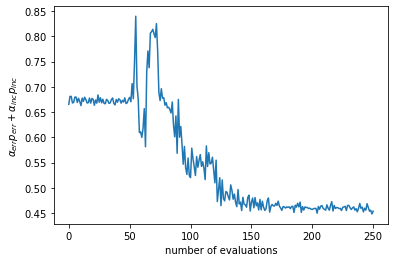

In [5]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = 2*[0], 2*[pi]
th_v1, th_v2 = 2*[0], 2*[0]
fi_v1, fi_v2 = 2*[0], 2*[0]
lam_v1, lam_v2 = 2*[0],  2*[0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.5
α_inc = 0.5
discriminator = nnd( [ ψ, ϕ, χ ], α_err, α_inc  )

datos = [ ]
results = discriminator.discriminate( SPSA(100), params, callback=callback )

print( results )

plt.plot( datos , '-')
plt.xlabel('number of evaluations')
plt.ylabel(r'$\alpha_{err} p_{err} + \alpha_{inc} p_{inc}$')